# GRN final version

In [ ]:
from __future__ import annotations

import pandas as pd

from sklearn.model_selection import GroupKFold

## Dataset Preprocessing

In [ ]:
ATTRIBUTES = {
    # meta information
    "#id": "ID",
    "issue": "Issue",
    "stance": "Stance",
    "argument": "Argument",
    "annotator": "Annotator",
    "argumentative": "Argumentative",
    # quality annotation
    "cogency": "CO",
    "local acceptability": "LA",
    "local relevance": "LR",
    "sufficiency": "LS",
    "effectiveness": "EF",
    "credibility": "CR",
    "emotional appeal": "EM",
    "clarity": "CL",
    "appropriateness": "AP",
    "arrangement": "AR",
    "reasonableness": "RE",
    "global acceptability": "GA",
    "global relevance": "GR",
    "global sufficiency": "GS",
    "overall quality": "OV"
}


def load_dataset(filename: str) -> pd.DataFrame:
    dataframe = pd.read_csv(filename, sep="\t", encoding="latin_1")

    # rename and reorder columns
    dataframe = dataframe.rename(columns=ATTRIBUTES)[list(ATTRIBUTES.values())]

    # data preprocessing
    dataframe = (
        dataframe
        # only keep argumentative instances
        .loc[dataframe["Argumentative"] == "y"]
        .drop(columns="Argumentative")
        # remove the "Cannot judge" instances
        .replace("Cannot judge", pd.NA).dropna()
        # replace the rating strings with integers
        .replace({"1 (Low)": 1, "2 (Average)": 2, "3 (High)": 3})
    )
    
    return dataframe.reset_index(drop=True)

In [ ]:
dataset = load_dataset("https://raw.githubusercontent.com/Rick0803/STAT541/main/dataset.csv")

dataset

,ID,Issue,Stance,Argument,Annotator,CO,LA,LR,LS,EF,CR,EM,CL,AP,AR,RE,GA,GR,GS,OV
0,arg219250,ban-plastic-water-bottles,no-bad-for-the-economy,"it is true that bottled water is a waste, but ...",1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1
1,arg219250,ban-plastic-water-bottles,no-bad-for-the-economy,"it is true that bottled water is a waste, but ...",2,1,3,2,1,1,2,2,3,2,2,2,3,1,1,1
2,arg219250,ban-plastic-water-bottles,no-bad-for-the-economy,"it is true that bottled water is a waste, but ...",3,2,2,3,2,2,2,1,2,2,2,2,2,2,2,2
3,arg219293,ban-plastic-water-bottles,no-bad-for-the-economy,Most Americans on average recycle 86-88% of th...,1,2,3,3,2,2,3,2,2,2,2,2,2,3,2,2
4,arg219293,ban-plastic-water-bottles,no-bad-for-the-economy,Most Americans on average recycle 86-88% of th...,2,1,2,2,1,1,2,2,2,1,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,arg168822,william-farquhar-ought-to-be-honoured-as-the-r...,yes-of-course,Raffles neglected Singapore when he went aroun...,2,1,2,2,1,1,2,2,2,3,2,2,3,2,1,2
930,arg168822,william-farquhar-ought-to-be-honoured-as-the-r...,yes-of-course,Raffles neglected Singapore when he went aroun...,3,2,2,3,2,2,2,2,2,2,2,2,2,3,2,2
931,arg168834,william-farquhar-ought-to-be-honoured-as-the-r...,yes-of-course,"Raffles doesn't care about the citizens, doesn...",1,2,2,3,2,2,2,2,1,2,2,2,2,3,2,2
932,arg168834,william-farquhar-ought-to-be-honoured-as-the-r...,yes-of-course,"Raffles doesn't care about the citizens, doesn...",2,1,2,2,1,2,2,3,3,3,2,2,2,2,1,2


In [ ]:
# train, valid, test set splitting
train, rest = next(GroupKFold(10).split(dataset, None, dataset["ID"]))
#rest = dataset.iloc[rest]
#valid, test = next(GroupKFold(2).split(rest, None, rest["ID"]))

train_dataframe = dataset.iloc[train]
valid_dataframe = dataset.iloc[rest]
#test_dataframe  = rest.iloc[test]
len(train_dataframe), len(valid_dataframe)

(841, 93)

## Build the Dataset

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.2 MB/s eta 0:00:00


In [ ]:
!python3 -m nltk.downloader book

/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_da

In [ ]:
import itertools as its

from nltk import sent_tokenize

import torch
from torch.utils.data import Dataset, DataLoader

from transformers import BertTokenizer, BertModel

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

token = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
class ArgumentQualityDataset(Dataset):
    def __init__(self, dataframe: pd.DataFrame, device: torch.device = device) -> None:
        issues = dataframe["Issue"].str.replace("-", " ").tolist()
        stances = dataframe["Stance"].str.replace("-", " ").tolist()
        
        self.stances = [f"{issue} [SEP] {stance}" for issue, stance in zip(issues, stances)]
        self.stances = [f"{stance}" for stance in stances]
        self.arguments = dataframe["Argument"].apply(sent_tokenize).tolist()
        self.qualities = (dataframe.iloc[:, -15:].values - 1).tolist()
    
    def __len__(self) -> int:
        return len(self.stances)
    
    def __getitem__(self, index: int) -> tuple[str, list[str], list[int]]:
        return self.stances[index], self.arguments[index], self.qualities[index]

In [ ]:
def argument_quality_collator(instances: list[tuple[str, list[str], list[int]]]) -> tuple[torch.tensor, torch.tensor, list[int], torch.tensor]:
    stances = [instance[0] for instance in instances]
    stances = token(stances, padding=True, return_tensors="pt")["input_ids"].to(device)
    
    lengths = [len(instance[1]) for instance in instances]
    sentences = list(its.chain.from_iterable(instance[1] for instance in instances))
    sentences = token(sentences, padding=True, return_tensors="pt")["input_ids"].to(device)
    
    qualities = torch.tensor([instance[2] for instance in instances], dtype=torch.int64, device=device)
    
    return stances, sentences, lengths, qualities

In [ ]:
train_dataset = ArgumentQualityDataset(train_dataframe)
valid_dataset = ArgumentQualityDataset(valid_dataframe)
#test_dataset  = ArgumentQualityDataset(test_dataframe)

train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True, collate_fn=argument_quality_collator)
valid_dataloader = DataLoader(valid_dataset, batch_size=12, shuffle=True, collate_fn=argument_quality_collator)
#test_dataloader  = DataLoader(test_dataset,  batch_size=12, shuffle=True, collate_fn=argument_quality_collator)

## Build the Model

In [ ]:
from torch import nn
from torch.nn.utils import rnn

In [ ]:
class ArgumentQualityModel(nn.Module):
    def __init__(self, hidden_dim: int, num_layer: int) -> None:
        super().__init__()
        
        # embedding stage
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        
        # rnn stage
        self.fc1 = nn.Linear(768, hidden_dim)
        self.rnn = nn.GRU(768, hidden_dim, num_layer, batch_first=True, bidirectional=True, dropout=0.6)
        
        # classification stage
        self.fcs = [nn.Linear(2 * hidden_dim, 3).to(device) for _ in range(15)]
        
    def forward(self, stance: torch.tensor, sentences: torch.tensor, argument_lengths: list[int] | None = None, softmax: bool = False) -> None:
        # if `argument_length` is None, assume single instance
        if argument_lengths is None:
            is_instance = True
            
            stance = stance.unsqueeze(dim=0)
            argument_lengths = [len(sentences)]
        else:
            is_instance = False
            
        # embedding stage
        ## step 1: embed stances
        ## stance: N x L (N: # of instances, L: max # of input ids)
        stance_embeddings = self.bert(stance).pooler_output
        
        ## step 2: embed sentences
        sentence_embeddings = self.bert(sentences).pooler_output
        
        # rnn stage
        ## step 1: the packed sequence
        index, slices = 0, []
        for length in argument_lengths:
            slices.append(slice(index, index + length))
            index += length
        
        arguments = [sentence_embeddings[slice] for slice in slices]
        
        ## step 2: RNN
        pack_sequences = rnn.pack_sequence(arguments, enforce_sorted=False)
        _, last_hiddens = self.rnn(pack_sequences)
        
        last_hiddens = torch.concat([last_hiddens[0], last_hiddens[1]], axis=1)
        
        # classification stage
        logits = torch.vstack([fc(last_hiddens).unsqueeze(dim=0) for fc in self.fcs])
        
        if softmax:
            return logits.softmax(dim=-1)
        
        return logits

In [ ]:
model = ArgumentQualityModel(3, 1).to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero

## Training

In [ ]:
from tqdm.notebook import tqdm, trange

from torch import optim

from statistics import mean

In [ ]:
dist = train_dataframe.iloc[:, -15:].apply(lambda x: x.value_counts())

dist

,CO,LA,LR,LS,EF,CR,EM,CL,AP,AR,RE,GA,GR,GS,OV
1,453,271,138,500,498,313,187,166,175,279,379,271,252,602,444
2,296,382,366,280,283,475,558,437,417,430,372,410,400,221,309
3,92,188,337,61,60,53,96,238,249,132,90,160,189,18,88


In [ ]:
weights = torch.tensor((dist.max() / dist).values.T, dtype=torch.float32, device=device)

weights

tensor([[ 1.0000,  1.5304,  4.9239],
        [ 1.4096,  1.0000,  2.0319],
        [ 2.6522,  1.0000,  1.0861],
        [ 1.0000,  1.7857,  8.1967],
        [ 1.0000,  1.7597,  8.3000],
        [ 1.5176,  1.0000,  8.9623],
        [ 2.9840,  1.0000,  5.8125],
        [ 2.6325,  1.0000,  1.8361],
        [ 2.3829,  1.0000,  1.6747],
        [ 1.5412,  1.0000,  3.2576],
        [ 1.0000,  1.0188,  4.2111],
        [ 1.5129,  1.0000,  2.5625],
        [ 1.5873,  1.0000,  2.1164],
        [ 1.0000,  2.7240, 33.4444],
        [ 1.0000,  1.4369,  5.0455]], device='cuda:0')

In [ ]:
lr = 1e-5

loss_fns = [nn.CrossEntropyLoss(weight=weights[i]) for i in range(15)]

optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_loss_total = []
valid_loss_total = []
train_co_acc = []
test_co_acc = []
train_ef_acc = []
test_ef_acc = []
train_re_acc = []
test_re_acc = []
train_avg_acc = []
test_avg_acc = []

for epoch in trange(100):
    # training cycle
    model.train()
    
    train_loss, train_acc = 0, [0 for _ in range(15)]
    
    for step, (stances, sentences, argument_lengths, qualitites) in tqdm(enumerate(train_dataloader), total=len(train_dataloader), leave=False):
        predictions = model(stances, sentences, argument_lengths)
        
        losses = [loss_fns[i](predictions[i], qualitites[:, i]) for i in range(15)]
        loss = sum(losses)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # information logging
        train_loss += len(stances) * loss.detach().item()

        predictions = predictions.detach().softmax(dim=-1)
        for i in range(15):
            train_acc[i] += sum(predictions[i].argmax(dim=-1) == qualitites[:, i]).detach().item()
        
        #torch.cuda.empty_cache()
        
    train_loss /= (N := len(train_dataloader.dataset))

    train_acc = [f"{acc / N:7.2%}" for acc in train_acc]

    train_loss_total.append(train_loss)
    train_co_acc.append(float(train_acc[0].strip('%'))/100)
    train_ef_acc.append(float(train_acc[4].strip('%'))/100)
    train_re_acc.append(float(train_acc[10].strip('%'))/100)

    temp = []
    for i in range(len(train_acc)):
      temp.append(float(train_acc[i].strip('%'))/100)
    train_avg_acc.append(mean(temp))

    tqdm.write("                  " + '  '.join(f"{i:7}" for i in dataset.columns[-15:]))
    tqdm.write(f"Train  {train_loss:8.3f}  {'  '.join(train_acc)}")
    
    # validation cycle
    model.eval()
    
    valid_loss, valid_acc = 0, [0 for _ in range(15)]
    
    for step, (stances, sentences, argument_lengths, qualitites) in tqdm(enumerate(valid_dataloader), total=len(valid_dataloader), leave=False):
        predictions = model(stances, sentences, argument_lengths)
        
        losses = [loss_fns[i](predictions[i], qualitites[:, i]) for i in range(15)]
        loss = sum(losses)
        
        # information logging
        valid_loss += len(stances) * loss.detach().item()

        predictions = predictions.detach().softmax(dim=-1)
        for i in range(15):
            valid_acc[i] += sum(predictions[i].argmax(dim=-1) == qualitites[:, i]).detach().item()
        
        #torch.cuda.empty_cache()
        
    valid_loss /= (N := len(valid_dataloader.dataset))
    valid_acc = [f"{acc / N:7.2%}" for acc in valid_acc]

    valid_loss_total.append(valid_loss)

    test_co_acc.append(float(valid_acc[0].strip('%'))/100)
    test_ef_acc.append(float(valid_acc[4].strip('%'))/100)
    test_re_acc.append(float(valid_acc[10].strip('%'))/100)

    temp = []
    for i in range(len(valid_acc)):
      temp.append(float(valid_acc[i].strip('%'))/100)
    test_avg_acc.append(mean(temp))
    
    tqdm.write(f"Valid  {valid_loss:8.3f}  {'  '.join(valid_acc)}")

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    17.063   41.50%   31.87%   39.95%   58.50%    7.25%   40.55%   44.11%   38.64%   47.32%   22.00%   42.93%   44.95%   30.08%   27.35%   47.32%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.949   11.83%   26.88%   38.71%   55.91%    5.38%   10.75%   72.04%   39.78%   29.03%   44.09%   36.56%   27.96%   27.96%   30.11%   12.90%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.860   19.98%   32.22%   43.28%   59.45%    7.13%   17.24%   56.36%   46.25%   40.55%   31.99%   41.50%   29.13%   29.96%   13.44%   36.03%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.898   18.28%   26.88%   47.31%   55.91%    5.38%   32.26%   54.84%   34.41%   50.54%   26.88%   32.26%   34.41%   27.96%    8.60%   39.78%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.863   16.88%   32.22%   41.62%   58.03%    7.13%   19.86%   56.24%   48.39%   43.16%   33.17%   37.10%   33.17%   29.96%   17.24%   39.83%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.833   12.90%   26.88%   46.24%   55.91%    5.38%   11.83%   70.97%   43.01%   27.96%   47.31%   51.61%   25.81%   27.96%   30.11%   12.90%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.853   19.38%   32.22%   42.69%   59.45%    7.02%   10.23%   65.04%   50.77%   37.81%   39.83%   43.04%   30.80%   29.96%   23.78%   32.58%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.921   11.83%   26.88%   43.01%   55.91%    5.38%    8.60%   74.19%   43.01%   29.03%   58.06%   37.63%   30.11%   27.96%   30.11%   13.98%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.744   21.28%   32.22%   44.35%   59.45%    7.13%   11.41%   65.28%   51.13%   42.81%   37.69%   41.02%   37.10%   30.08%   22.47%   37.81%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.817   16.13%   26.88%   47.31%   55.91%    5.38%   15.05%   66.67%   32.26%   46.24%   44.09%   54.84%   31.18%   27.96%   23.66%   26.88%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.693   19.26%   32.22%   40.55%   59.45%    7.13%   11.30%   64.45%   51.37%   43.04%   41.74%   40.78%   39.36%   30.32%   24.26%   40.07%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.843   31.18%   26.88%   54.84%   55.91%    5.38%   11.83%   72.04%   43.01%   49.46%   40.86%   53.76%   43.01%   27.96%   31.18%   35.48%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.677   26.99%   32.22%   44.47%   59.45%    7.13%   17.36%   61.24%   47.68%   46.02%   39.12%   43.04%   42.45%   30.68%   27.71%   42.09%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.796   11.83%   26.88%   44.09%   55.91%    5.38%    8.60%   74.19%   27.96%   49.46%   50.54%   53.76%   30.11%   29.03%   23.66%   24.73%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.637   27.35%   32.22%   46.61%   59.45%    7.13%   13.91%   65.16%   48.75%   45.30%   37.57%   45.54%   45.78%   31.51%   34.13%   41.62%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.801   26.88%   26.88%   51.61%   55.91%    5.38%   10.75%   70.97%   44.09%   38.71%   51.61%   46.24%   34.41%   31.18%   38.71%   25.81%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.525   30.44%   32.22%   48.39%   59.45%    7.25%   14.74%   61.83%   47.44%   48.16%   38.64%   44.23%   48.04%   34.72%   29.96%   42.45%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.664   19.35%   26.88%   47.31%   55.91%    5.38%    8.60%   73.12%   40.86%   53.76%   47.31%   52.69%   41.94%   31.18%   29.03%   29.03%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.509   32.82%   32.22%   48.04%   59.45%    7.02%   15.81%   63.38%   50.18%   47.92%   38.53%   44.00%   48.04%   35.79%   34.36%   44.83%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.750   19.35%   26.88%   49.46%   55.91%    5.38%    8.60%   69.89%   45.16%   47.31%   46.24%   50.54%   43.01%   31.18%   24.73%   29.03%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.435   36.03%   32.22%   48.51%   59.45%    7.13%   15.81%   64.33%   50.65%   46.37%   38.64%   48.28%   48.99%   37.34%   34.72%   44.11%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.799   17.20%   26.88%   44.09%   55.91%    5.38%    8.60%   73.12%   46.24%   35.48%   52.69%   46.24%   30.11%   34.41%   31.18%   22.58%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.425   34.24%   32.22%   46.02%   59.45%    7.13%   17.84%   62.43%   51.84%   46.97%   36.03%   46.37%   50.06%   36.15%   32.82%   43.76%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.866   34.41%   26.88%   55.91%   55.91%    5.38%    9.68%   72.04%   43.01%   43.01%   48.39%   51.61%   44.09%   34.41%   38.71%   29.03%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.406   33.65%   32.22%   46.37%   59.45%    7.25%   15.46%   66.23%   50.42%   46.73%   34.84%   47.68%   48.75%   38.64%   33.89%   45.54%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.756   21.51%   26.88%   46.24%   55.91%    5.38%    8.60%   72.04%   44.09%   46.24%   52.69%   51.61%   44.09%   31.18%   23.66%   24.73%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.371   36.15%   32.22%   46.25%   59.45%    7.13%   15.46%   63.50%   52.91%   46.02%   35.67%   48.28%   50.30%   39.00%   34.96%   43.16%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.715   22.58%   26.88%   51.61%   55.91%    5.38%    9.68%   70.97%   46.24%   47.31%   51.61%   48.39%   49.46%   32.26%   33.33%   33.33%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.343   34.48%   32.22%   45.18%   59.45%    7.13%   14.39%   66.71%   52.79%   43.40%   38.17%   48.75%   49.11%   39.95%   34.48%   42.45%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.701   21.51%   26.88%   48.39%   55.91%    5.38%    8.60%   73.12%   54.84%   48.39%   48.39%   49.46%   49.46%   34.41%   23.66%   25.81%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.330   36.86%   32.22%   45.78%   59.45%    7.02%   15.34%   64.68%   53.51%   43.52%   39.24%   48.75%   50.89%   40.67%   32.10%   44.35%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.759   26.88%   26.88%   53.76%   55.91%    5.38%   13.98%   65.59%   41.94%   47.31%   45.16%   48.39%   48.39%   34.41%   31.18%   29.03%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.346   41.38%   32.34%   44.59%   59.33%    7.13%   17.48%   64.68%   55.29%   47.44%   33.65%   49.23%   49.82%   41.74%   36.39%   47.21%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.737   20.43%   26.88%   47.31%   55.91%    5.38%   11.83%   72.04%   43.01%   39.78%   52.69%   50.54%   37.63%   32.26%   33.33%   23.66%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.307   34.84%   32.22%   46.85%   59.45%    7.13%   14.74%   67.42%   53.15%   43.76%   38.41%   49.58%   48.87%   41.62%   34.24%   42.93%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.881   34.41%   26.88%   51.61%   55.91%    5.38%    9.68%   74.19%   46.24%   48.39%   40.86%   49.46%   46.24%   35.48%   37.63%   40.86%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.300   34.24%   32.22%   44.23%   59.33%    7.13%   14.63%   66.23%   56.00%   44.59%   38.88%   49.82%   49.35%   41.85%   33.77%   43.76%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.644   20.43%   26.88%   49.46%   55.91%    5.38%    8.60%   73.12%   48.39%   45.16%   54.84%   41.94%   38.71%   38.71%   24.73%   29.03%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.286   37.46%   32.22%   44.95%   59.33%    7.13%   15.34%   64.80%   53.63%   45.30%   39.48%   49.46%   49.94%   42.69%   33.29%   45.90%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.622   16.13%   26.88%   49.46%   55.91%    5.38%   11.83%   72.04%   54.84%   44.09%   49.46%   47.31%   46.24%   37.63%   30.11%   31.18%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.296   34.84%   32.22%   43.28%   59.45%    7.13%   14.03%   65.64%   55.41%   44.47%   41.14%   48.87%   48.75%   42.93%   33.06%   43.76%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.659   17.20%   26.88%   46.24%   55.91%    5.38%    8.60%   73.12%   48.39%   39.78%   51.61%   49.46%   30.11%   38.71%   30.11%   25.81%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.266   32.94%   32.22%   43.16%   59.10%    7.02%   15.10%   66.47%   54.46%   44.35%   43.88%   53.27%   50.18%   43.40%   33.17%   43.16%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.685   18.28%   25.81%   41.94%   54.84%    5.38%   10.75%   73.12%   51.61%   43.01%   45.16%   39.78%   44.09%   34.41%   37.63%   32.26%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.222   31.51%   27.23%   40.19%   51.49%    7.13%   19.50%   63.85%   56.96%   43.88%   44.71%   47.56%   58.26%   40.19%   46.25%   48.99%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.889   31.18%   23.66%   50.54%   49.46%    5.38%   18.28%   68.82%   45.16%   45.16%   40.86%   41.94%   46.24%   31.18%   48.39%   44.09%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.129   29.61%   22.24%   42.81%   44.35%    7.37%   22.59%   56.84%   56.00%   42.57%   46.25%   48.39%   62.19%   40.07%   54.34%   47.32%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.714   17.20%   22.58%   38.71%   44.09%    5.38%   21.51%   52.69%   49.46%   45.16%   36.56%   36.56%   34.41%   31.18%   52.69%   35.48%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.103   32.10%   18.79%   40.43%   35.32%    8.80%   27.82%   55.05%   54.93%   43.04%   46.02%   43.52%   63.61%   40.67%   59.33%   52.08%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.843   29.03%   25.81%   40.86%   50.54%    5.38%   21.51%   67.74%   51.61%   40.86%   34.41%   35.48%   43.01%   31.18%   43.01%   36.56%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    16.062   33.53%   20.33%   39.36%   39.36%    9.27%   26.16%   58.74%   55.89%   42.93%   48.16%   45.66%   64.57%   42.09%   56.12%   50.06%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.920   19.35%   24.73%   39.78%   48.39%    5.38%   20.43%   65.59%   46.24%   36.56%   37.63%   36.56%   31.18%   33.33%   43.01%   20.43%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.986   36.15%   18.55%   38.64%   31.15%   12.37%   30.68%   55.77%   56.48%   42.93%   47.68%   39.95%   62.90%   41.26%   63.26%   52.91%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.808   17.20%   29.03%   39.78%   47.31%    5.38%   24.73%   60.22%   52.69%   39.78%   41.94%   36.56%   41.94%   33.33%   51.61%   35.48%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.961   37.46%   16.17%   38.41%   31.87%   14.74%   30.08%   59.81%   57.19%   39.83%   47.32%   39.00%   62.78%   42.21%   63.50%   52.44%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.880   22.58%   27.96%   36.56%   40.86%    5.38%   32.26%   59.14%   51.61%   34.41%   34.41%   34.41%   39.78%   31.18%   53.76%   40.86%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.951   40.07%   15.81%   40.07%   27.94%   16.29%   33.41%   58.38%   56.48%   37.46%   46.37%   35.79%   62.66%   41.26%   67.66%   54.93%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.869   27.96%   25.81%   33.33%   54.84%    5.38%   12.90%   70.97%   52.69%   31.18%   38.71%   44.09%   38.71%   33.33%   46.24%   23.66%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.884   41.14%   15.93%   41.26%   28.42%   17.00%   31.51%   60.88%   58.03%   38.76%   48.51%   36.15%   64.45%   42.93%   65.04%   52.79%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.895   23.66%   21.51%   46.24%   54.84%   12.90%   16.13%   69.89%   44.09%   23.66%   32.26%   36.56%   29.03%   31.18%   36.56%   29.03%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.892   44.11%   15.58%   41.38%   26.87%   19.62%   33.41%   58.50%   57.31%   37.57%   47.92%   34.96%   63.02%   40.90%   68.13%   53.98%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.882   22.58%   24.73%   39.78%   49.46%    5.38%   20.43%   67.74%   49.46%   30.11%   44.09%   44.09%   39.78%   31.18%   45.16%   27.96%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.897   43.64%   15.22%   43.16%   27.47%   17.00%   31.99%   58.26%   58.03%   37.57%   48.04%   34.60%   63.73%   41.14%   65.99%   53.98%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.771   18.28%   31.18%   38.71%   48.39%    5.38%   19.35%   66.67%   51.61%   34.41%   36.56%   36.56%   31.18%   32.26%   47.31%   29.03%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.865   44.83%   14.63%   42.93%   28.54%   20.69%   31.15%   58.98%   56.48%   38.05%   50.18%   38.29%   63.14%   42.21%   64.45%   53.86%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.901   31.18%   20.43%   37.63%   35.48%    6.45%   36.56%   61.29%   52.69%   29.03%   35.48%   25.81%   34.41%   31.18%   52.69%   37.63%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.827   44.00%   13.79%   44.83%   27.47%   23.07%   33.65%   56.12%   56.60%   36.98%   48.28%   43.88%   63.50%   41.85%   66.47%   54.10%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.906   24.73%   24.73%   36.56%   53.76%    5.38%   12.90%   70.97%   47.31%   35.48%   33.33%   48.39%   35.48%   32.26%   44.09%   24.73%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.775   43.88%   13.08%   44.35%   28.06%   23.90%   32.46%   58.86%   55.77%   37.22%   48.99%   45.18%   63.85%   42.69%   65.40%   54.70%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.887   22.58%   22.58%   43.01%   48.39%   10.75%   15.05%   66.67%   46.24%   29.03%   38.71%   34.41%   34.41%   30.11%   47.31%   31.18%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.733   38.53%   14.27%   46.37%   29.96%   24.26%   31.87%   60.05%   56.96%   36.98%   47.92%   46.14%   63.61%   42.21%   64.80%   55.41%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.733   23.66%   22.58%   44.09%   44.09%    8.60%   22.58%   59.14%   49.46%   32.26%   39.78%   30.11%   32.26%   33.33%   60.22%   38.71%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.749   40.78%   14.39%   46.97%   27.59%   24.97%   32.34%   58.50%   55.41%   35.79%   48.51%   46.97%   64.57%   43.16%   66.47%   55.89%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.919   33.33%   24.73%   36.56%   53.76%    5.38%   13.98%   72.04%   48.39%   37.63%   31.18%   47.31%   34.41%   34.41%   41.94%   31.18%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.704   41.38%   14.27%   48.99%   27.59%   23.54%   32.94%   59.81%   56.96%   36.98%   47.68%   45.66%   64.68%   42.33%   65.99%   55.41%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.818   29.03%   22.58%   40.86%   44.09%    5.38%   20.43%   63.44%   52.69%   31.18%   38.71%   33.33%   40.86%   31.18%   49.46%   40.86%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.677   40.31%   14.03%   49.46%   26.87%   24.85%   31.03%   60.40%   56.48%   35.79%   49.23%   45.90%   64.45%   41.74%   66.47%   55.65%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.790   24.73%   23.66%   45.16%   52.69%    8.60%   16.13%   66.67%   51.61%   32.26%   43.01%   38.71%   32.26%   32.26%   37.63%   26.88%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.680   39.83%   13.91%   50.30%   26.75%   26.16%   32.58%   61.95%   56.96%   36.50%   49.58%   47.80%   63.38%   41.02%   66.11%   55.65%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.850   26.88%   25.81%   43.01%   50.54%    5.38%   11.83%   65.59%   48.39%   38.71%   37.63%   37.63%   38.71%   29.03%   47.31%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.671   42.09%   14.74%   51.84%   27.59%   21.28%   34.01%   58.26%   57.31%   37.81%   49.35%   45.42%   63.97%   41.97%   64.80%   55.65%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.833   36.56%   30.11%   40.86%   41.94%    5.38%   26.88%   66.67%   49.46%   32.26%   43.01%   35.48%   41.94%   33.33%   54.84%   38.71%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.682   41.14%   14.15%   51.96%   24.85%   26.28%   33.53%   60.17%   57.43%   37.69%   48.16%   47.09%   64.80%   42.09%   65.76%   56.24%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.832   25.81%   29.03%   40.86%   52.69%    8.60%   13.98%   67.74%   48.39%   30.11%   40.86%   43.01%   30.11%   34.41%   40.86%   30.11%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.684   39.00%   14.63%   52.56%   26.52%   24.85%   32.58%   60.88%   56.48%   36.98%   49.70%   49.11%   64.21%   41.97%   63.73%   54.93%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.761   35.48%   27.96%   39.78%   50.54%    5.38%   25.81%   62.37%   49.46%   38.71%   36.56%   34.41%   41.94%   32.26%   50.54%   41.94%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.688   42.33%   13.44%   50.54%   24.97%   22.47%   33.17%   60.64%   56.84%   37.57%   49.11%   45.66%   64.21%   41.62%   66.59%   55.29%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.751   27.96%   23.66%   40.86%   49.46%    5.38%   17.20%   68.82%   49.46%   36.56%   31.18%   38.71%   40.86%   29.03%   51.61%   37.63%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.663   41.38%   13.56%   52.32%   26.63%   22.47%   32.46%   59.81%   57.79%   38.29%   49.70%   48.16%   63.50%   41.38%   65.16%   55.65%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.720   25.81%   22.58%   39.78%   41.94%    5.38%   26.88%   64.52%   48.39%   26.88%   34.41%   33.33%   32.26%   29.03%   47.31%   30.11%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.674   40.67%   13.56%   50.30%   25.45%   22.83%   33.53%   60.64%   56.72%   38.88%   49.23%   47.80%   63.97%   41.26%   65.76%   56.12%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.775   35.48%   23.66%   38.71%   46.24%    5.38%   16.13%   67.74%   48.39%   36.56%   35.48%   33.33%   46.24%   31.18%   48.39%   39.78%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.648   42.33%   13.08%   52.20%   25.45%   23.42%   33.41%   59.45%   57.07%   37.46%   48.51%   45.90%   64.92%   41.26%   65.64%   55.77%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.801   26.88%   26.88%   40.86%   46.24%    5.38%   29.03%   64.52%   50.54%   36.56%   36.56%   38.71%   47.31%   29.03%   51.61%   39.78%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.649   40.55%   13.67%   52.44%   26.63%   25.45%   34.24%   57.79%   57.31%   37.93%   48.99%   47.80%   64.57%   41.85%   65.16%   55.89%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.796   22.58%   24.73%   37.63%   53.76%    8.60%   19.35%   65.59%   50.54%   31.18%   32.26%   45.16%   33.33%   29.03%   44.09%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.638   41.14%   14.15%   52.79%   25.45%   22.71%   32.46%   61.00%   57.55%   38.29%   48.63%   47.68%   64.80%   41.14%   65.40%   55.29%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.739   25.81%   27.96%   37.63%   52.69%    5.38%   15.05%   66.67%   48.39%   37.63%   34.41%   39.78%   41.94%   30.11%   48.39%   38.71%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.663   39.83%   13.91%   50.18%   25.80%   24.61%   34.13%   58.74%   56.84%   38.17%   48.99%   47.09%   63.61%   41.50%   64.92%   55.29%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.796   29.03%   31.18%   39.78%   53.76%    5.38%   18.28%   66.67%   50.54%   33.33%   37.63%   37.63%   41.94%   32.26%   48.39%   30.11%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.676   41.97%   14.27%   51.25%   26.75%   22.35%   33.06%   60.17%   58.03%   38.17%   50.30%   46.25%   64.21%   41.38%   64.92%   54.10%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.695   25.81%   27.96%   41.94%   54.84%    8.60%   13.98%   68.82%   51.61%   38.71%   33.33%   41.94%   30.11%   27.96%   39.78%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.628   42.21%   13.44%   52.56%   25.80%   23.90%   34.60%   59.93%   57.91%   39.00%   48.04%   47.92%   63.97%   40.90%   64.33%   54.46%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.737   26.88%   31.18%   32.26%   46.24%    5.38%   29.03%   62.37%   52.69%   34.41%   43.01%   37.63%   39.78%   31.18%   50.54%   36.56%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.671   41.38%   13.32%   52.20%   26.16%   24.73%   33.06%   61.12%   56.48%   40.19%   49.70%   51.25%   64.33%   42.45%   64.09%   56.00%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.662   27.96%   31.18%   38.71%   53.76%    5.38%   20.43%   62.37%   50.54%   33.33%   41.94%   39.78%   40.86%   32.26%   48.39%   36.56%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.649   39.83%   13.79%   50.18%   26.28%   25.68%   33.17%   59.10%   56.84%   37.57%   48.75%   48.63%   63.97%   42.33%   64.45%   55.89%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.801   31.18%   22.58%   36.56%   45.16%    5.38%   29.03%   63.44%   53.76%   44.09%   38.71%   43.01%   45.16%   31.18%   53.76%   44.09%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.618   41.74%   14.27%   53.51%   26.63%   23.90%   33.17%   60.05%   58.38%   39.00%   49.58%   48.16%   63.73%   41.14%   64.68%   56.96%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.704   21.51%   30.11%   37.63%   53.76%    5.38%   20.43%   59.14%   47.31%   36.56%   35.48%   45.16%   44.09%   31.18%   41.94%   37.63%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.632   41.62%   14.15%   52.91%   27.82%   26.04%   33.77%   59.10%   57.31%   38.64%   49.82%   48.99%   64.57%   41.97%   65.04%   55.29%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.736   29.03%   26.88%   35.48%   48.39%    6.45%   25.81%   59.14%   49.46%   27.96%   38.71%   35.48%   37.63%   31.18%   47.31%   37.63%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.657   41.97%   13.44%   51.96%   25.09%   23.42%   34.60%   58.26%   56.48%   39.12%   47.21%   44.83%   65.87%   40.19%   66.23%   56.48%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.781   26.88%   26.88%   35.48%   51.61%    5.38%   17.20%   60.22%   47.31%   32.26%   45.16%   47.31%   38.71%   31.18%   47.31%   27.96%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.665   42.69%   14.15%   51.72%   26.75%   22.71%   34.01%   59.81%   56.84%   40.19%   48.16%   44.23%   63.97%   41.38%   65.87%   55.89%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.689   20.43%   29.03%   32.26%   59.14%   10.75%   24.73%   60.22%   51.61%   32.26%   46.24%   36.56%   34.41%   32.26%   41.94%   30.11%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.627   41.26%   12.96%   51.01%   25.21%   23.66%   34.48%   59.45%   56.96%   38.76%   49.94%   48.04%   66.59%   41.50%   64.57%   56.00%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.584   26.88%   25.81%   35.48%   50.54%    5.38%   21.51%   62.37%   50.54%   37.63%   39.78%   41.94%   48.39%   33.33%   49.46%   37.63%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.648   42.57%   12.96%   51.13%   25.33%   23.78%   33.41%   59.22%   57.91%   39.24%   48.39%   46.85%   64.33%   41.26%   64.68%   56.72%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.735   31.18%   18.28%   41.94%   44.09%    7.53%   25.81%   54.84%   50.54%   30.11%   40.86%   35.48%   34.41%   31.18%   52.69%   31.18%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.620   41.38%   13.56%   53.15%   25.33%   24.49%   32.94%   61.12%   57.91%   38.41%   49.23%   48.04%   63.85%   41.26%   63.26%   55.65%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.731   30.11%   27.96%   35.48%   47.31%    5.38%   26.88%   60.22%   49.46%   36.56%   43.01%   39.78%   41.94%   31.18%   50.54%   32.26%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.647   40.43%   13.91%   52.79%   26.87%   23.66%   32.82%   60.29%   57.19%   39.12%   50.77%   47.92%   63.73%   41.85%   63.61%   54.93%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.738   25.81%   21.51%   36.56%   37.63%    5.38%   39.78%   52.69%   52.69%   35.48%   31.18%   37.63%   39.78%   31.18%   58.06%   41.94%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.649   42.45%   13.32%   54.10%   25.92%   22.95%   33.65%   60.64%   57.31%   39.00%   48.99%   48.28%   63.85%   40.90%   64.33%   55.29%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.715   29.03%   29.03%   38.71%   47.31%    6.45%   27.96%   58.06%   51.61%   34.41%   37.63%   37.63%   37.63%   30.11%   50.54%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.620   41.38%   13.56%   52.91%   25.09%   24.26%   33.77%   60.17%   57.55%   38.41%   49.35%   47.80%   63.02%   41.38%   64.09%   56.00%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.699   29.03%   19.35%   38.71%   39.78%    5.38%   30.11%   63.44%   50.54%   34.41%   34.41%   37.63%   35.48%   31.18%   54.84%   37.63%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.616   42.69%   13.79%   53.51%   26.04%   23.90%   33.29%   60.05%   58.15%   38.29%   49.46%   46.85%   65.28%   41.97%   65.52%   56.36%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.634   26.88%   26.88%   39.78%   50.54%    6.45%   26.88%   59.14%   49.46%   30.11%   45.16%   38.71%   38.71%   31.18%   52.69%   30.11%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.610   42.81%   13.67%   52.56%   23.54%   24.85%   33.65%   60.64%   58.62%   38.29%   49.46%   48.51%   65.40%   42.09%   64.92%   55.77%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.699   26.88%   36.56%   33.33%   53.76%    5.38%   22.58%   52.69%   48.39%   37.63%   39.78%   39.78%   36.56%   29.03%   45.16%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.641   41.62%   13.56%   53.86%   26.75%   24.26%   33.77%   60.05%   57.67%   39.00%   49.11%   47.56%   65.04%   41.26%   63.61%   56.72%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.709   27.96%   23.66%   35.48%   40.86%    6.45%   29.03%   60.22%   50.54%   32.26%   31.18%   34.41%   34.41%   31.18%   54.84%   37.63%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.630   42.21%   14.15%   52.08%   26.04%   24.38%   33.77%   58.86%   57.67%   38.64%   49.46%   48.75%   64.45%   40.78%   64.21%   56.72%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.802   32.26%   21.51%   39.78%   27.96%    6.45%   39.78%   46.24%   49.46%   36.56%   27.96%   33.33%   36.56%   30.11%   56.99%   41.94%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.628   40.90%   13.32%   51.96%   24.14%   24.49%   33.89%   60.05%   58.50%   38.41%   49.46%   47.80%   63.14%   40.78%   65.99%   56.12%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.687   26.88%   26.88%   40.86%   51.61%    5.38%   20.43%   65.59%   49.46%   34.41%   41.94%   39.78%   36.56%   31.18%   50.54%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.645   41.97%   13.08%   53.39%   25.80%   24.97%   33.77%   61.24%   58.50%   38.53%   48.99%   49.82%   64.09%   41.26%   63.73%   55.65%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.735   25.81%   22.58%   33.33%   43.01%    5.38%   30.11%   64.52%   51.61%   33.33%   40.86%   32.26%   47.31%   31.18%   58.06%   35.48%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.616   42.33%   14.39%   52.68%   24.14%   23.42%   33.65%   60.29%   58.03%   37.81%   49.94%   46.97%   64.33%   41.74%   63.85%   56.72%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.636   27.96%   29.03%   34.41%   52.69%    8.60%   22.58%   60.22%   48.39%   26.88%   43.01%   36.56%   34.41%   32.26%   47.31%   27.96%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.602   42.57%   14.15%   53.15%   26.40%   24.73%   34.60%   59.93%   57.19%   38.53%   49.11%   47.09%   63.50%   41.14%   65.52%   57.31%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.767   27.96%   27.96%   41.94%   47.31%    5.38%   25.81%   62.37%   49.46%   29.03%   40.86%   33.33%   43.01%   29.03%   58.06%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.608   42.69%   14.15%   53.75%   25.09%   23.78%   34.72%   60.76%   58.50%   38.29%   49.70%   47.56%   64.21%   41.74%   64.33%   55.77%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.678   25.81%   33.33%   39.78%   55.91%    5.38%   22.58%   59.14%   48.39%   33.33%   41.94%   38.71%   40.86%   29.03%   44.09%   35.48%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.597   42.33%   14.27%   52.68%   26.28%   24.85%   34.01%   61.00%   58.98%   38.64%   50.77%   47.80%   63.26%   42.09%   63.85%   56.60%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.827   25.81%   22.58%   36.56%   38.71%    5.38%   31.18%   58.06%   50.54%   33.33%   30.11%   33.33%   34.41%   29.03%   58.06%   40.86%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.609   42.33%   14.27%   53.27%   25.80%   24.02%   34.84%   59.10%   57.31%   39.12%   49.58%   46.25%   63.97%   41.02%   65.76%   56.24%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.902   29.03%   26.88%   40.86%   58.06%    8.60%   16.13%   63.44%   47.31%   30.11%   26.88%   45.16%   33.33%   36.56%   38.71%   27.96%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.598   40.90%   14.39%   53.27%   24.73%   26.40%   34.96%   60.64%   57.67%   38.53%   49.94%   48.39%   65.04%   41.97%   63.02%   55.65%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.733   30.11%   27.96%   33.33%   49.46%    5.38%   23.66%   58.06%   48.39%   45.16%   34.41%   36.56%   46.24%   31.18%   49.46%   36.56%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.602   44.71%   14.39%   53.39%   25.56%   24.97%   34.60%   59.81%   57.07%   39.24%   50.18%   46.97%   65.04%   42.09%   65.40%   56.48%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.775   25.81%   29.03%   35.48%   56.99%    5.38%   21.51%   60.22%   49.46%   34.41%   43.01%   44.09%   43.01%   31.18%   49.46%   36.56%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.598   45.07%   13.91%   53.39%   24.85%   24.85%   35.08%   59.93%   58.15%   38.64%   50.65%   48.51%   64.68%   41.85%   65.16%   56.36%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.720   23.66%   20.43%   39.78%   39.78%    7.53%   29.03%   56.99%   49.46%   25.81%   40.86%   38.71%   38.71%   31.18%   55.91%   33.33%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.613   43.64%   14.51%   53.27%   24.97%   24.85%   35.67%   59.45%   56.72%   39.36%   49.70%   47.92%   65.76%   42.09%   64.68%   56.12%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.698   21.51%   23.66%   37.63%   39.78%    9.68%   26.88%   62.37%   51.61%   30.11%   34.41%   36.56%   31.18%   29.03%   50.54%   33.33%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.624   42.09%   14.74%   53.15%   24.85%   23.42%   34.60%   58.74%   56.84%   38.88%   49.70%   48.16%   64.33%   41.50%   65.16%   55.89%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.678   25.81%   25.81%   34.41%   53.76%    5.38%   17.20%   61.29%   50.54%   34.41%   44.09%   35.48%   43.01%   31.18%   52.69%   26.88%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.609   43.40%   15.10%   52.79%   26.63%   25.68%   34.72%   61.71%   57.55%   39.60%   48.75%   48.87%   65.64%   42.21%   64.68%   56.00%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.792   26.88%   27.96%   40.86%   40.86%    7.53%   36.56%   48.39%   50.54%   40.86%   30.11%   27.96%   33.33%   31.18%   53.76%   38.71%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.611   43.76%   14.98%   53.86%   24.02%   23.66%   35.20%   61.36%   56.24%   38.53%   49.23%   47.44%   63.97%   41.62%   66.47%   56.60%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.696   25.81%   33.33%   36.56%   50.54%   10.75%   24.73%   59.14%   48.39%   31.18%   47.31%   37.63%   36.56%   31.18%   52.69%   35.48%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.629   46.49%   15.81%   51.84%   26.40%   25.09%   33.53%   60.52%   57.79%   39.71%   49.82%   47.68%   65.52%   41.97%   64.92%   56.96%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.716   22.58%   25.81%   38.71%   49.46%    8.60%   20.43%   63.44%   50.54%   30.11%   46.24%   33.33%   38.71%   30.11%   53.76%   36.56%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.622   45.07%   14.51%   53.51%   26.40%   25.33%   33.41%   61.00%   57.55%   37.81%   50.30%   47.44%   65.52%   42.09%   64.21%   55.77%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.716   16.13%   30.11%   38.71%   58.06%    8.60%   19.35%   63.44%   47.31%   30.11%   36.56%   39.78%   27.96%   31.18%   46.24%   30.11%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.598   44.00%   13.79%   53.27%   24.97%   24.38%   34.96%   58.86%   57.55%   39.24%   48.75%   46.37%   63.38%   41.02%   65.28%   58.03%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.615   22.58%   30.11%   44.09%   53.76%    5.38%   23.66%   62.37%   49.46%   33.33%   43.01%   35.48%   33.33%   31.18%   45.16%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.598   45.18%   13.79%   52.20%   26.99%   25.21%   33.89%   60.76%   58.26%   38.05%   51.49%   48.87%   65.99%   41.85%   64.68%   55.89%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.799   24.73%   25.81%   41.94%   44.09%    7.53%   32.26%   59.14%   49.46%   26.88%   38.71%   32.26%   32.26%   29.03%   48.39%   33.33%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.578   44.95%   14.27%   52.68%   25.33%   25.56%   34.96%   59.81%   57.31%   38.64%   48.87%   49.46%   65.28%   41.97%   64.92%   56.84%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.657   23.66%   27.96%   46.24%   58.06%    5.38%   15.05%   63.44%   49.46%   37.63%   43.01%   38.71%   38.71%   30.11%   51.61%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.609   44.35%   14.74%   53.27%   24.85%   25.09%   34.96%   59.33%   57.79%   38.88%   50.18%   47.44%   64.09%   41.74%   64.92%   55.89%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.764   19.35%   23.66%   38.71%   48.39%    5.38%   24.73%   63.44%   49.46%   31.18%   46.24%   39.78%   32.26%   31.18%   51.61%   24.73%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.579   43.76%   14.74%   52.20%   25.45%   24.73%   34.60%   60.29%   58.26%   39.36%   50.18%   47.32%   64.45%   41.97%   64.21%   56.12%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.807   21.51%   34.41%   38.71%   45.16%    5.38%   25.81%   52.69%   49.46%   38.71%   31.18%   30.11%   41.94%   31.18%   50.54%   40.86%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.592   44.00%   14.86%   54.46%   24.49%   24.49%   34.24%   60.40%   58.03%   39.48%   50.42%   49.35%   65.87%   42.09%   64.68%   56.60%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.790   19.35%   33.33%   38.71%   50.54%    5.38%   21.51%   55.91%   48.39%   32.26%   38.71%   41.94%   34.41%   31.18%   45.16%   30.11%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.633   41.26%   14.39%   52.20%   24.97%   26.28%   34.84%   60.76%   57.67%   38.05%   50.77%   48.75%   63.85%   42.45%   63.85%   55.65%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.860   19.35%   31.18%   41.94%   60.22%    5.38%   13.98%   68.82%   47.31%   31.18%   49.46%   33.33%   36.56%   30.11%   37.63%   21.51%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.609   44.00%   15.10%   53.39%   25.56%   23.54%   34.48%   60.17%   58.38%   37.69%   50.89%   46.97%   63.73%   42.09%   63.97%   56.84%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.734   24.73%   27.96%   38.71%   59.14%    5.38%   17.20%   63.44%   48.39%   39.78%   47.31%   35.48%   40.86%   29.03%   44.09%   29.03%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.612   44.59%   15.10%   52.91%   24.02%   23.90%   33.65%   62.07%   57.79%   37.93%   50.06%   49.70%   64.45%   41.85%   65.52%   56.24%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.775   21.51%   25.81%   44.09%   55.91%    7.53%   23.66%   62.37%   51.61%   31.18%   40.86%   37.63%   34.41%   31.18%   46.24%   26.88%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.621   44.11%   15.70%   52.79%   24.73%   24.97%   34.36%   61.59%   57.07%   37.46%   51.01%   49.70%   64.80%   42.33%   64.45%   55.29%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.872   29.03%   32.26%   47.31%   49.46%    5.38%   26.88%   58.06%   47.31%   36.56%   32.26%   24.73%   40.86%   29.03%   54.84%   44.09%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.598   43.04%   15.58%   51.49%   24.49%   23.90%   34.24%   60.64%   58.03%   37.46%   49.82%   49.46%   65.04%   42.21%   65.04%   57.19%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.862   29.03%   32.26%   35.48%   41.94%    7.53%   32.26%   53.76%   53.76%   43.01%   31.18%   32.26%   41.94%   26.88%   56.99%   44.09%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.588   46.61%   14.86%   52.79%   25.09%   24.38%   34.36%   61.00%   58.50%   38.17%   50.06%   48.63%   66.23%   42.09%   66.59%   56.00%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.687   25.81%   24.73%   37.63%   55.91%    5.38%   17.20%   64.52%   49.46%   35.48%   41.94%   34.41%   38.71%   31.18%   38.71%   30.11%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.586   44.00%   15.70%   53.75%   25.92%   24.02%   34.48%   60.64%   57.79%   37.69%   50.65%   48.87%   64.57%   41.97%   65.28%   56.36%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.894   26.88%   32.26%   40.86%   40.86%    9.68%   32.26%   50.54%   50.54%   35.48%   30.11%   31.18%   37.63%   29.03%   58.06%   39.78%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.582   42.93%   15.10%   53.03%   24.49%   24.85%   34.72%   60.40%   58.62%   37.81%   50.54%   48.75%   63.02%   42.69%   64.57%   56.96%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.854   29.03%   29.03%   47.31%   46.24%    5.38%   23.66%   65.59%   43.01%   32.26%   30.11%   31.18%   40.86%   29.03%   45.16%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.576   45.66%   15.10%   53.39%   24.26%   23.42%   34.60%   61.36%   57.55%   38.17%   50.18%   48.63%   64.45%   41.85%   66.11%   56.00%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.829   24.73%   25.81%   46.24%   49.46%    7.53%   31.18%   55.91%   50.54%   32.26%   35.48%   30.11%   29.03%   29.03%   51.61%   34.41%


  0%|          | 0/71 [00:00<?, ?it/s]

                  CO       LA       LR       LS       EF       CR       EM       CL       AP       AR       RE       GA       GR       GS       OV     
Train    15.588   44.00%   15.10%   53.98%   25.09%   23.78%   34.36%   60.52%   57.31%   37.10%   50.89%   46.14%   63.73%   42.57%   65.64%   56.96%


  0%|          | 0/8 [00:00<?, ?it/s]

Valid    16.762   26.88%   27.96%   43.01%   52.69%    5.38%   25.81%   60.22%   49.46%   38.71%   34.41%   35.48%   35.48%   31.18%   48.39%   31.18%


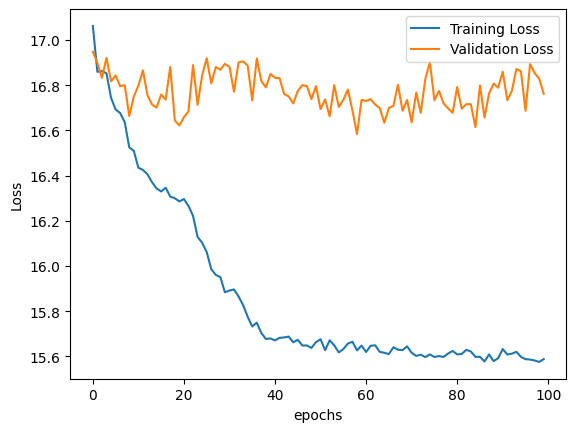

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(train_loss_total)
plt.plot(valid_loss_total)


plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xlabel('epochs')
plt.ylabel('Loss')


plt.show()

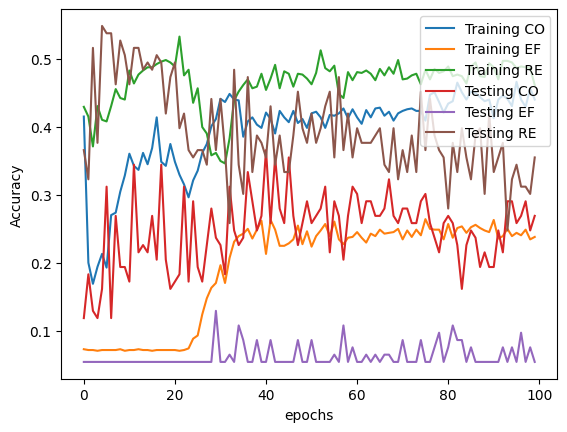

In [ ]:
plt.plot(train_co_acc)
plt.plot(train_ef_acc)
plt.plot(train_re_acc)

plt.plot(test_co_acc)
plt.plot(test_ef_acc)
plt.plot(test_re_acc)


plt.legend(['Training CO', 'Training EF', 'Training RE', 'Testing CO', 
            'Testing EF', 'Testing RE'], loc='upper right')
plt.xlabel('epochs')
plt.ylabel('Accuracy')


plt.show()

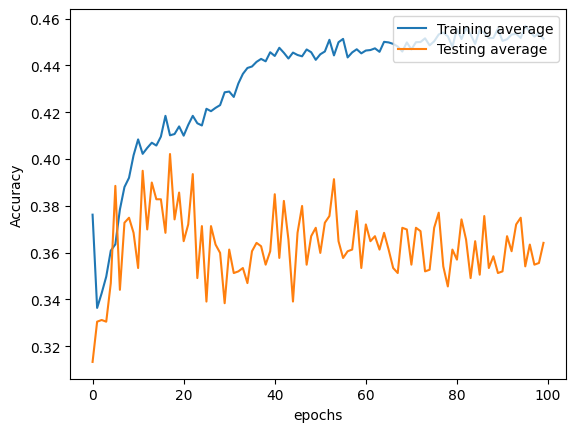

In [ ]:
plt.plot(train_avg_acc)

plt.plot(test_avg_acc)


plt.legend(['Training average', 'Testing average',], loc='upper right')
plt.xlabel('epochs')
plt.ylabel('Accuracy')


plt.show()